This notebook demonstrates the use of the UCT dataset through the following:
- Reading in the dataset
- Visualization
- Evaluation

The `UCT_Dataset` class consume the dataset json file and can be used to get insights into the dataset

In [1]:
from uct_dataset import UCT_Dataset

# Read in a particular dataset file
ds = UCT_Dataset('UCT_dataset_Cloudstone_July_2024_train.json')
ds.stats()


Stats :
Number of classes : 346
Avg. number of tracks per class : 9.589595375722544
Most Tracks : 86  (class_id 147)


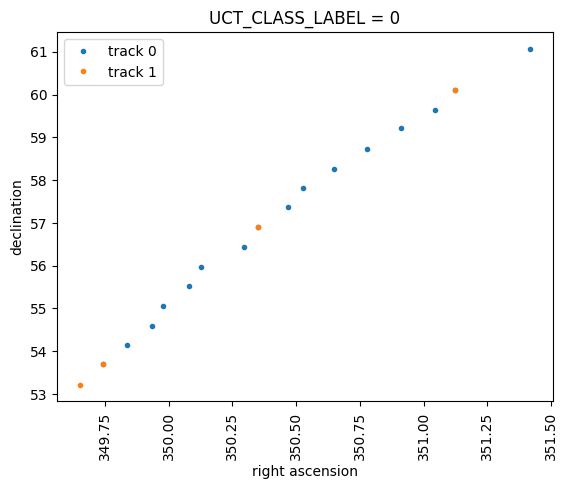

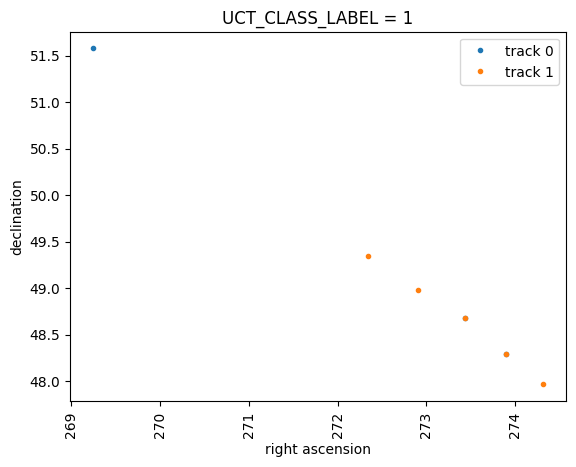

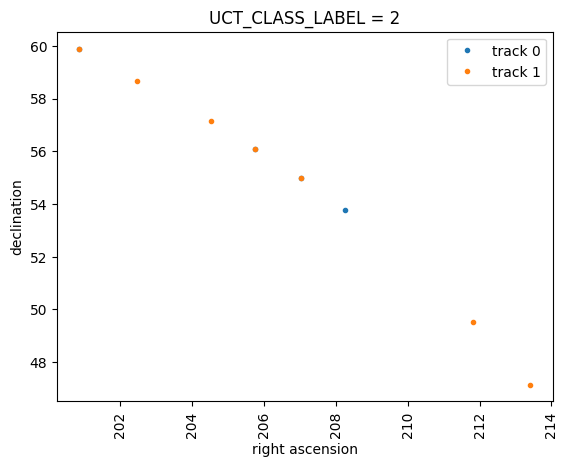

In [3]:
import matplotlib.pyplot as plt
from matplotlib import pyplot


# Get all the class labels in the dataset
classes = ds.get_class_labels()


# Visualize the tracks in the first three classes

for class_label in classes[:3]:
    tracks = ds.get_tracks(class_label)
    for idx,t in enumerate(tracks):
        plt.plot(t.ra, t.declination,'.', label=f'track {str(idx)}')

    plt.title(f"UCT_CLASS_LABEL = {class_label }")
    plt.legend()
    plt.xticks(rotation = 90)
    plt.xlabel('right ascension')
    plt.ylabel('declination')
    plt.show()
    plt.close()

pyplot.close()

## Evalution of the results

We first have a dummy class that generate some results

In [4]:
# Evaluating a random solution

import pandas as pd
import random

class RandomSolution:
    def __init__(self) -> None:
        pass

    def compute(self, data : pd.DataFrame):
        all_tracks = data.trackId.unique()


        result = []
        for track in all_tracks:
            result.append({ "query" : track,
                            "matches" : random.sample(sorted(all_tracks),5)})
            
        return result


class GTSolution:
    def __init__(self) -> None:
        pass

    def compute(self, data : pd.DataFrame):
        all_tracks = data.trackId.unique()


        result = []
        for idx,track in enumerate(all_tracks):
                GT = data
                true_class = GT[GT.trackId == track].UCT_CLASS_LABEL.values[0]
                true_matches = GT[GT.UCT_CLASS_LABEL == true_class].trackId.unique()
                result.append({ "query" : track,
                                "matches" : true_matches})
            
        return result


gt_result = GTSolution().compute(pd.read_json('UCT_dataset_Cloudstone_July_2024_test.json'))
random_result = RandomSolution().compute(pd.read_json('UCT_dataset_Cloudstone_July_2024_test.json'))

Let's use the `Evaluate` class to evalute the solution

In [5]:

import importlib
import uct_dataset

importlib.reload(uct_dataset)

from uct_dataset import Evaluate

e = Evaluate('test_associations.json')

precision, recall = e.compare(gt_result)
print(f"GT Solution: {precision = }, {recall = }")

precision, recall = e.compare(random_result)
print(f"Random Solution:  {precision = }, {recall = }")


GT Solution: precision = 1.0, recall = 1.0
Random Solution:  precision = 0.026530612244897958, recall = 0.006270348486675509
